# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [4]:
cities[0]

'busselton'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
        

In [6]:
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b3ff37a40edf22f7c0171626f6994478


In [7]:

#create lists for storing api data
cityName = []
lat = []
lng = []
maxTemp = []
humidity = []
clouds = []
windSpeed = []
country = []
dates = []

# set initial count quantities for organization
countRecord = 1
countSet = 1

print(f"Beginning Data Retrieval")
print(f"------------------------------------------")

# loops for creating dataframe columns
for city in cities:
    
    
    try:
       
        response = requests.get(f"{url}&q={city}").json()
        cityName.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])               
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        
        
        print(f"Processing Record {countRecord} of set {countSet} | {city}")  
                
        countRecord += 1
        time.sleep(1)
         
        if countRecord == 51:
            countSet += 1
            countRecord = 1
   
    except KeyError:
        print("City not found. Skipping...")
        #print((f"{url}&q={city}"))
    #break
    continue
    
  

print(f"------------------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------------------")

Beginning Data Retrieval
------------------------------------------
Processing Record 1 of set 1 | busselton
Processing Record 2 of set 1 | colac
Processing Record 3 of set 1 | carnarvon
Processing Record 4 of set 1 | atuona
Processing Record 5 of set 1 | punta arenas
Processing Record 6 of set 1 | lompoc
Processing Record 7 of set 1 | bitung
Processing Record 8 of set 1 | cabo san lucas
Processing Record 9 of set 1 | narsaq
Processing Record 10 of set 1 | hilo
Processing Record 11 of set 1 | norman wells
Processing Record 12 of set 1 | boksitogorsk
Processing Record 13 of set 1 | atar
Processing Record 14 of set 1 | sambava
Processing Record 15 of set 1 | florence
Processing Record 16 of set 1 | kutum
Processing Record 17 of set 1 | naze
Processing Record 18 of set 1 | klaksvik
Processing Record 19 of set 1 | coihaique
Processing Record 20 of set 1 | mar del plata
Processing Record 21 of set 1 | sitka
Processing Record 22 of set 1 | bredasdorp
Processing Record 23 of set 1 | san andre

Processing Record 38 of set 4 | luanda
Processing Record 39 of set 4 | guatire
Processing Record 40 of set 4 | kavaratti
Processing Record 41 of set 4 | ginir
Processing Record 42 of set 4 | grand gaube
Processing Record 43 of set 4 | znamenka
Processing Record 44 of set 4 | aklavik
Processing Record 45 of set 4 | budaun
Processing Record 46 of set 4 | santa isabel do rio negro
City not found. Skipping...
Processing Record 47 of set 4 | doka
Processing Record 48 of set 4 | tiarei
Processing Record 49 of set 4 | san patricio
Processing Record 50 of set 4 | lagunas
Processing Record 1 of set 5 | ribeira grande
Processing Record 2 of set 5 | hami
Processing Record 3 of set 5 | kangaba
Processing Record 4 of set 5 | eureka
Processing Record 5 of set 5 | hithadhoo
Processing Record 6 of set 5 | lasa
Processing Record 7 of set 5 | castro
Processing Record 8 of set 5 | kapit
Processing Record 9 of set 5 | poso
Processing Record 10 of set 5 | gejiu
Processing Record 11 of set 5 | nome
Processi

Processing Record 23 of set 8 | barcelos
Processing Record 24 of set 8 | garachine
Processing Record 25 of set 8 | vao
Processing Record 26 of set 8 | russell
Processing Record 27 of set 8 | svetlogorsk
Processing Record 28 of set 8 | korfovskiy
Processing Record 29 of set 8 | sao joao da barra
Processing Record 30 of set 8 | diffa
Processing Record 31 of set 8 | ziro
Processing Record 32 of set 8 | rocha
Processing Record 33 of set 8 | baiyin
Processing Record 34 of set 8 | barkhan
Processing Record 35 of set 8 | venezuela
Processing Record 36 of set 8 | evensk
Processing Record 37 of set 8 | maciel
Processing Record 38 of set 8 | kovdor
City not found. Skipping...
Processing Record 39 of set 8 | slave lake
Processing Record 40 of set 8 | nizwa
Processing Record 41 of set 8 | oranjemund
Processing Record 42 of set 8 | akyab
City not found. Skipping...
Processing Record 43 of set 8 | brookings
Processing Record 44 of set 8 | aqtobe
Processing Record 45 of set 8 | kasongo-lunda
City not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictionary from the lists
cityDict = {
    "City": cityName,
    "Lat":lat, 
    "Lng":lng,
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness":clouds, 
    "Wind Speed":windSpeed,
    "Country":country,
    "Date":dates      
    }

# Create a dataframe
city_data_df = pd.DataFrame(cityDict)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,69.01,48,100,30.96,AU,1588663244
1,Colac,-38.33,143.58,61.00,72,100,4.61,AU,1588663245
2,Carnarvon,-24.87,113.63,80.60,65,75,9.17,AU,1588663246
3,Atuona,-9.80,-139.03,81.43,78,1,17.25,PF,1588663247
4,Punta Arenas,-53.15,-70.92,33.80,64,0,5.82,CL,1588663249


In [9]:
#city_data_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,69.01,48,100,30.96,AU,1588663244
1,Colac,-38.33,143.58,61.00,72,100,4.61,AU,1588663245
2,Carnarvon,-24.87,113.63,80.60,65,75,9.17,AU,1588663246
3,Atuona,-9.80,-139.03,81.43,78,1,17.25,PF,1588663247
4,Punta Arenas,-53.15,-70.92,33.80,64,0,5.82,CL,1588663249
...,...,...,...,...,...,...,...,...,...
552,Palmer,42.16,-72.33,42.01,65,1,4.70,US,1588663946
553,Flin Flon,54.77,-101.86,36.99,77,91,9.28,CA,1588663948
554,Kyabram,-36.32,145.05,61.00,64,0,4.97,AU,1588663949
555,Miranda,3.25,-76.23,68.00,88,40,2.24,CO,1588663950


In [13]:
#  Get the indices of cities that have humidity over 100%.
idx100 = city_data_df[city_data_df['Humidity'] >= 100].index

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data_df = city_data_df.drop(idx100, inplace=False)

cleaned_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,69.01,48,100,30.96,AU,1588663244
1,Colac,-38.33,143.58,61.00,72,100,4.61,AU,1588663245
2,Carnarvon,-24.87,113.63,80.60,65,75,9.17,AU,1588663246
3,Atuona,-9.80,-139.03,81.43,78,1,17.25,PF,1588663247
4,Punta Arenas,-53.15,-70.92,33.80,64,0,5.82,CL,1588663249


In [15]:
# Extract relevant fields from the data frame
relevant_df = cleaned_city_data_df.filter(['City', 'Lat', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'], axis=1)
relevant_df.head() 
# Export the City_Data into a csv
relevant_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

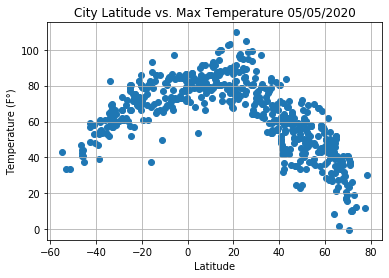

In [16]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Max Temp"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F°)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("output_data/City Latitude vs. Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

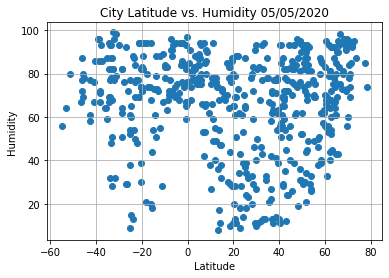

In [17]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Humidity"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("output_data/City Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

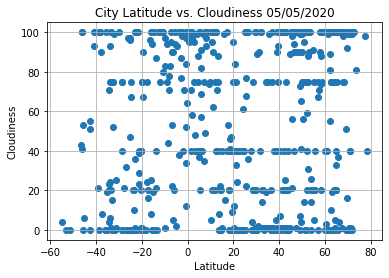

In [18]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Cloudiness"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("output_data/City Latitude vs. Cloudinessy.png")
plt.show()

## Latitude vs. Wind Speed Plot

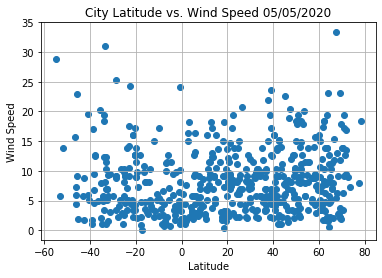

In [19]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Wind Speed"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the chart
plt.savefig("output_data/City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
def linPlot()

    x_values = housing_data['RM']
    y_values = housing_data['MEDV']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Rooms in House')
    plt.ylabel('Median House Prices ($1000)')
    plt.show()
    
    return